# Exploratory data analysis

1. PassengerId: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как индентификатор строки и, что логично, идентификатор пассжира (т.к. для каждого пассажира в датасете представлена только одна строка).
2. Survived: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.
3. Pclass: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.
4. Name: Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.
5. Sex: Пол пассажира. Либо мужчины (=Male) Либо женщины (=Female).
6. Age: Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записанv в датасет.
7. SibSp: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.
8. Parch: Количество родителей/детей.
9. Ticket: Номер билета.
10. Fare: Сумма, которую заплатил пассажир за путешествие.
11. Cabin: Номер каюты пассажира. "NaN" значения в этой колонке указавает на то, что номер каюты данного пассажира не был записан.
12. Embarked: Порт отправления данного пассажира.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_values(graph, frequency = False, scales=(0.,2.)):
    for p in graph.ax.patches:
        txt_x, txt_y = p.get_x(), p.get_height()
        txt =  '        ' + str(p.get_height().round(2))
        txt += '%' if frequency else ''
        graph.ax.text(txt_x + scales[0],txt_y + scales[1], txt)


In [4]:
data_train = pd.read_csv('titanic_train.csv')

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Есть недостающие данные о возрасте

In [7]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data_train.groupby(['Pclass']).Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Уберем выбросы (цена больше 300) и посмотрим на график цены

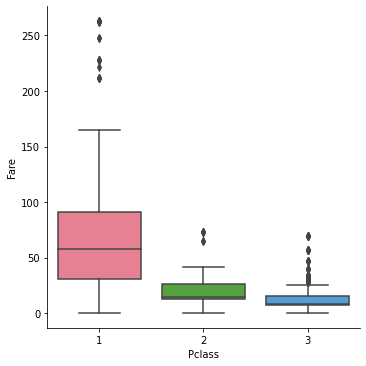

In [9]:
sns.catplot(x = 'Pclass', y = 'Fare', data = data_train[data_train['Fare'] < 300], kind = 'box', height = 5, palette='husl')

Краткий анализ количественных данных: 
1. Age - данные распределены нормально (среднее значение примерно равно 50% процентилю)
2. Fare (цена билета) - при среднем 32, на 50 процентиле находится значение 14, что свидетельствует о сдвиге вправо. Судя по графику, цена на билеты в 1 класс в среднем выше (84.1) цены на другие классы (2-ой - 20.66 и 3-ий - 13.67).

### Кто находился на корабле

In [10]:
data_train.Pclass.value_counts() # в абсолютной величине

3    491
1    216
2    184
Name: Pclass, dtype: int64

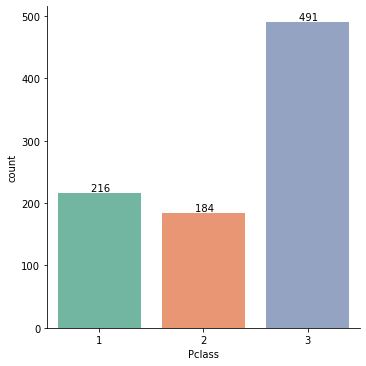

In [11]:
g = sns.catplot(data = data_train, kind = 'count', x='Pclass', palette = 'Set2')
plot_values(g, scales=(0.08,2.5)) # в абсолютной величине

In [10]:
data_train.Pclass.value_counts(normalize = True) 

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

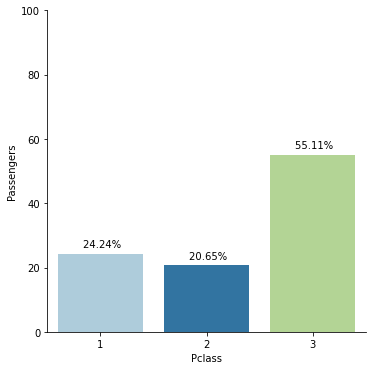

In [11]:
df = data_train.Pclass.value_counts(normalize = True).mul(100).rename('percent').reset_index()
df.columns = ['Pclass', 'Passengers']

g = sns.catplot(data = df, x = 'Pclass', y = 'Passengers', kind = 'bar', palette='Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=True)

Больше всего пассажиров было в 3 классе

In [12]:
data_train.Sex.value_counts(normalize = True) 

male      0.647587
female    0.352413
Name: Sex, dtype: float64

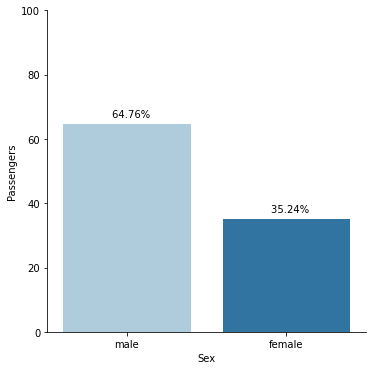

In [13]:
df = data_train.Sex.value_counts(normalize = True).mul(100).rename('percent').reset_index()
df.columns = ['Sex', 'Passengers']

g = sns.catplot(data = df, x = 'Sex', y = 'Passengers', kind = 'bar', palette='Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=True, scales=(0.15,2))

Среди всех пассажиров на корабле находилось больше мужчин. Проверим по классам

In [14]:
data_train.groupby(['Pclass']).Sex.value_counts(normalize = True) 

Pclass  Sex   
1       male      0.564815
        female    0.435185
2       male      0.586957
        female    0.413043
3       male      0.706721
        female    0.293279
Name: Sex, dtype: float64

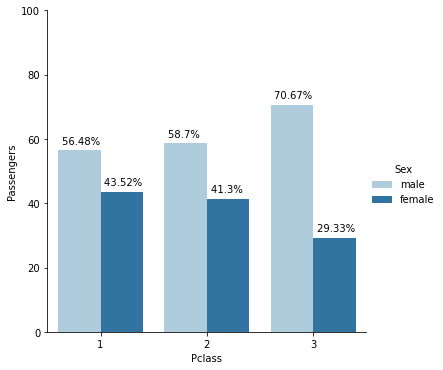

In [15]:
df = data_train.groupby(['Pclass'])['Sex'].value_counts(normalize = True).mul(100).rename('percent').reset_index()
df.columns = ['Pclass', 'Sex', 'Passengers']

g = sns.catplot(data = df, x = 'Pclass', y = 'Passengers', hue = 'Sex', kind = 'bar', palette='Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=True, scales=(-0.2,2))

1. Больше всего пассажиров было в 3 классе. При этом разница между количеством пассажиров между 1 и 2 классом небольшая.
2. Большая часть пассажиров на корабле - мужчины
3. Во всех классах мужчин было больше. В 1 и 2 классах разница небольшая (было больше пар), в 3 - мужчин намного больше (может быть связано с тем, что в 3-м классе было больше семей, где дети - мальчики)

In [16]:
data_train.groupby(['Pclass','Sex']).Age.mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

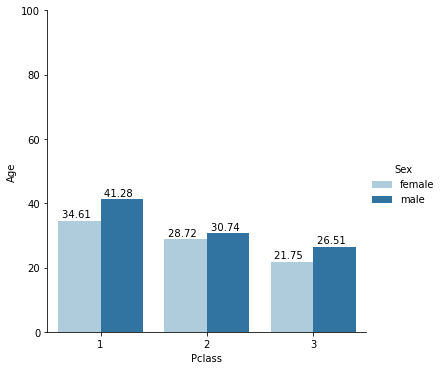

In [17]:
df = data_train.groupby(['Pclass','Sex']).Age.mean().reset_index()
g = sns.catplot(data = df, x = 'Pclass', y = 'Age', hue = 'Sex', kind = 'bar', palette='Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=False,scales=(-0.2,1))

1. Средний возраст увеличивается по мере увеличения класса. Скорей всего потому что люди в среднем богаче когда старше, а у молодежи денег немного
2. В первом классе возраст мужчин был намного больше возраста женщин (в 3-м чуть поменьше разница). Во 2-ом - примерно одинаковая. Можно сделать вывод что взрослые мужчины с деньгами (потому что билеты в 1 класс стоят дороже) предпочитают женщин помоложе

Сколько родных людей путешествовало вместе с пассажиром в зависимости от класса

In [18]:
data_train.groupby(['Pclass']).SibSp.value_counts(normalize = True) # количество родных

Pclass  SibSp
1       0        0.634259
        1        0.328704
        2        0.023148
        3        0.013889
2       0        0.652174
        1        0.298913
        2        0.043478
        3        0.005435
3       0        0.714868
        1        0.169043
        4        0.036660
        2        0.030550
        3        0.024440
        8        0.014257
        5        0.010183
Name: SibSp, dtype: float64

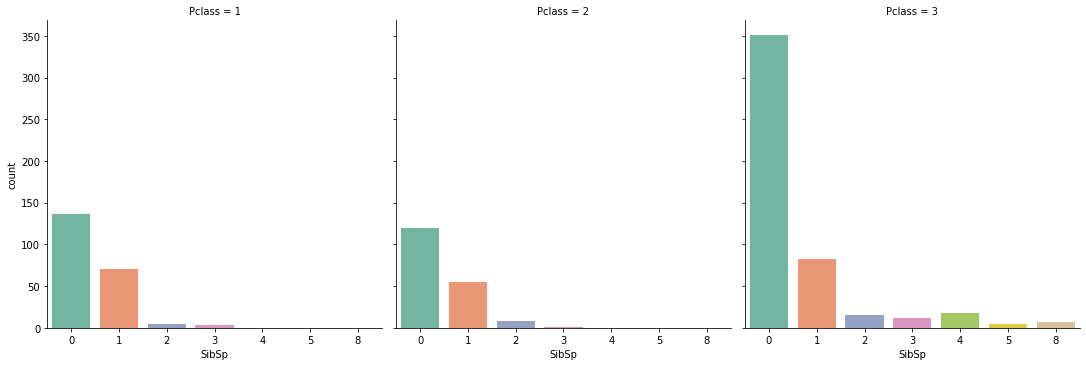

In [19]:
sns.catplot(col = 'Pclass', x='SibSp', kind='count', data=data_train, palette = sns.color_palette("Set2", 8))

Посмотрим на данные, где родственников больше 0 (SibSp > 0)

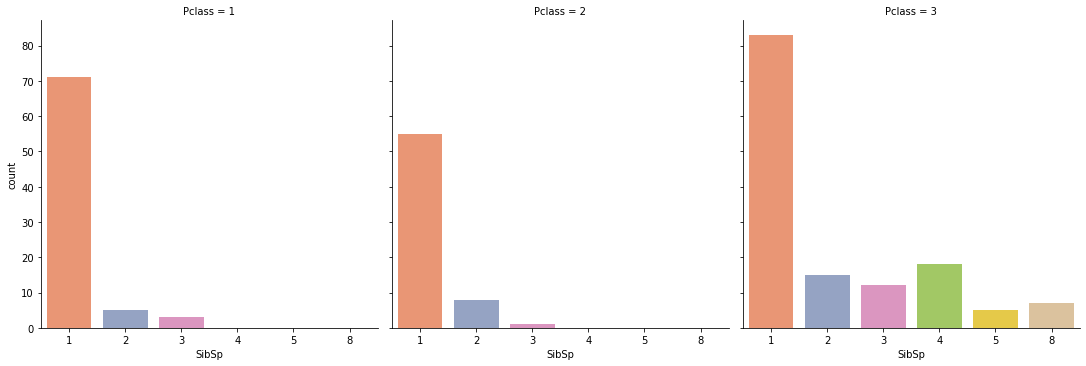

In [20]:
sns.catplot(col = 'Pclass', x='SibSp', kind='count', data=data_train[data_train['SibSp'] > 0], palette = sns.color_palette("Set2", 8)[1:])

Из графика можно сделать вывод что в 1 и 2 классе количество больших семей (больше 3х людей) равно нулю и в сравнении с 3 классом, в 1 и 2 классах гараздо меньше семей в целом

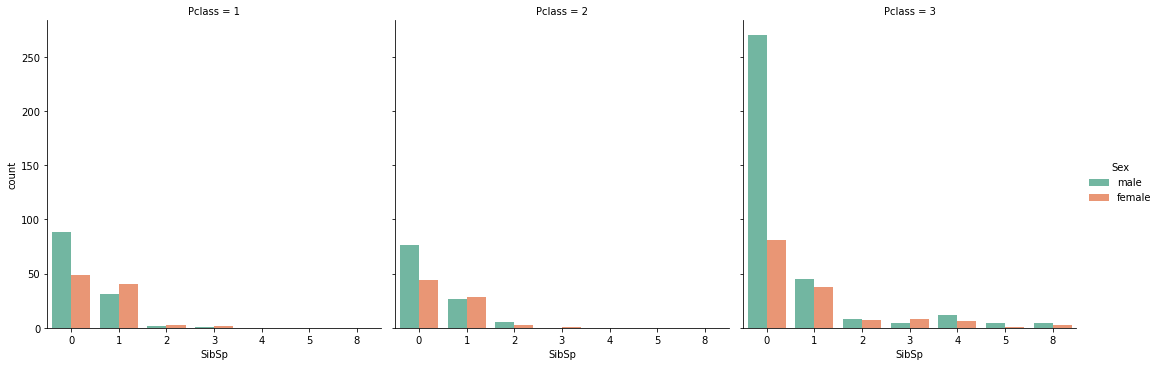

In [21]:
sns.catplot(col = 'Pclass', x='SibSp', kind='count', data=data_train, hue = 'Sex', palette = 'Set2')

Судя по графику, можно сделать вывод что вне зависимости от класса, больше всего людей без родственников были мужчинами. То что во 2-м классе равное количество людей было с 1 родственником подтверждает теорию о том что там было больше пар

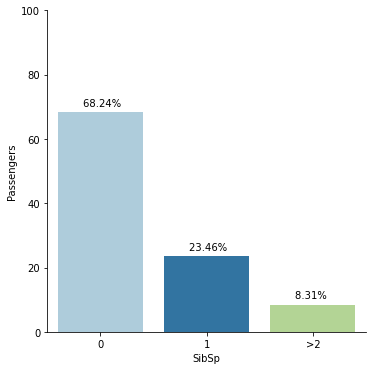

In [22]:
df = pd.DataFrame({'SibSp':['0','1','>2'], 'Passengers':[(data_train[data_train['SibSp'] == 0].PassengerId.count() / data_train.shape[0]), 
                                                    (data_train[data_train['SibSp'] == 1].PassengerId.count() / data_train.shape[0]),
                                                    (data_train[data_train['SibSp'] > 1].PassengerId.count() / data_train.shape[0]) ] } )
df['Passengers']= df['Passengers'] * 100

g = sns.catplot(x='SibSp', kind = 'bar', y='Passengers', data = df, palette='Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=True)

In [23]:
df_1 = pd.DataFrame({'SibSp':[0,0],'Survived':[0,1], 'Passengers':(data_train[data_train['SibSp'] == 0].groupby('Survived').SibSp.count() 
                                                            / data_train[data_train['SibSp'] == 0].PassengerId.count())*100})
df_1.reset_index(drop = True, inplace = True)

df_2 = pd.DataFrame({'SibSp':[1,1],'Survived':[0,1], 'Passengers':(data_train[data_train['SibSp'] == 1].groupby('Survived').SibSp.count() 
                                                            / data_train[data_train['SibSp'] == 1].PassengerId.count())*100})
df_2.reset_index(drop = True, inplace = True)

df_3 = pd.DataFrame({'SibSp':['>1','>1'],'Survived':[0,1], 'Passengers':(data_train[data_train['SibSp'] >= 1].groupby('Survived').SibSp.count() 
                                                            / data_train[data_train['SibSp'] >= 1].PassengerId.count())*100})
df_3.reset_index(drop = True, inplace = True)
df_2 = df_1.append(df_2)
df_3 = df_2.append(df_3)

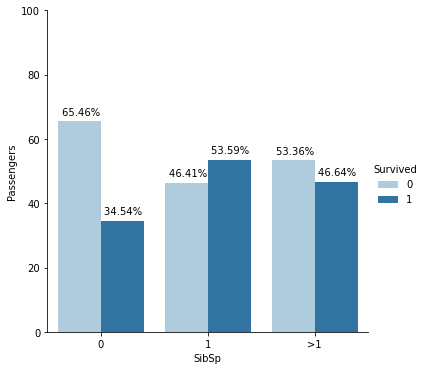

In [24]:
g = sns.catplot(data = df_3, y = 'Passengers', x = 'SibSp', hue = 'Survived', kind='bar', palette = 'Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=True, scales=(-0.2,2))

1. Больше всего людей на корабле было без супругов/братьев/сестер
2. Самые большие шансы на выживание у тех, у кого есть 1 родственник (или супруг, или брат/сестра)

In [25]:
data_train.groupby(['Pclass']).Parch.value_counts(normalize = True) # количество пассажиров с родителелями/детьми

Pclass  Parch
1       0        0.754630
        1        0.143519
        2        0.097222
        4        0.004630
2       0        0.728261
        1        0.173913
        2        0.086957
        3        0.010870
3       0        0.775967
        1        0.112016
        2        0.087576
        5        0.010183
        3        0.006110
        4        0.006110
        6        0.002037
Name: Parch, dtype: float64

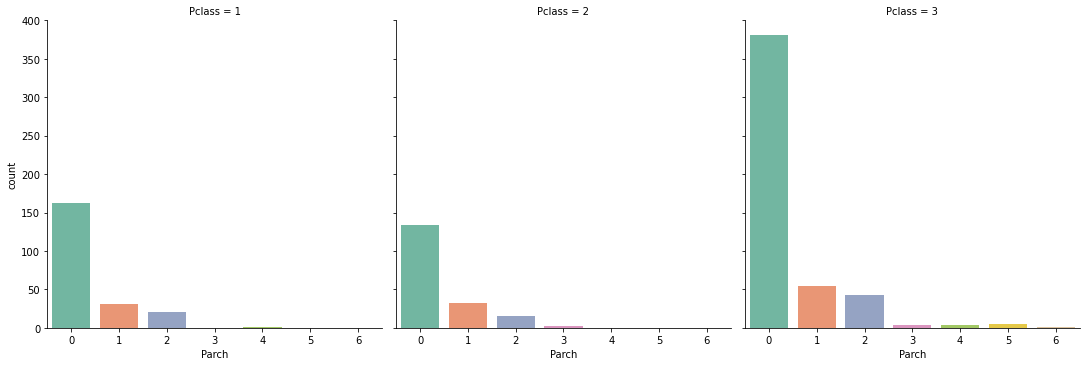

In [26]:
sns.catplot(col= 'Pclass', x='Parch', kind='count', data=data_train, palette='Set2')

Уберем тех кто был без детей/супругов и посмотрим на график

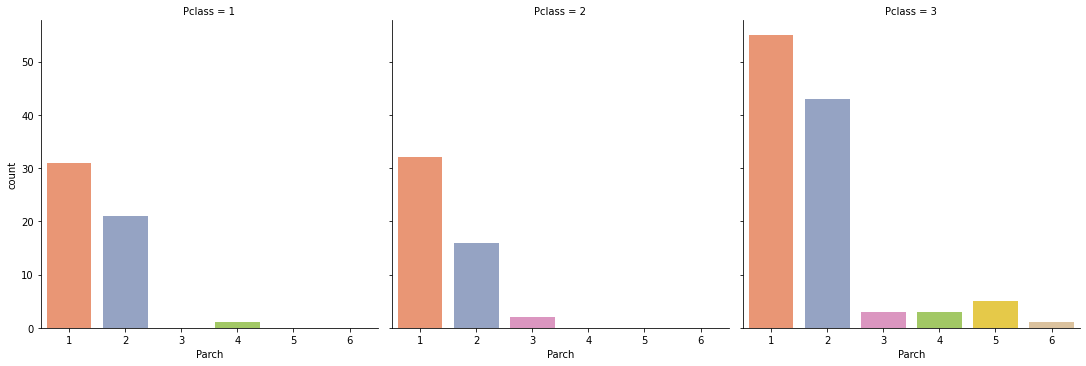

In [27]:
sns.catplot(col= 'Pclass', x='Parch', kind='count', data=data_train[data_train['Parch'] > 0], palette = sns.color_palette("Set2", 8)[1:])

По графикам видно, что больше всего пассажиров которые были с родителями/детьми находились в 3 классе. Скорей всего из-за дешевых билетов. Можно было купить билеты на всю семью за относительно не дорогую стоимость

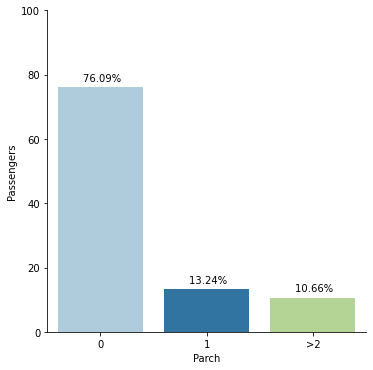

In [28]:
df = pd.DataFrame({'Parch':['0','1','>2'], 'Passengers':[(data_train[data_train['Parch'] == 0].PassengerId.count() / data_train.shape[0]), 
                                                    (data_train[data_train['Parch'] == 1].PassengerId.count() / data_train.shape[0]),
                                                    (data_train[data_train['Parch'] > 1].PassengerId.count() / data_train.shape[0]) ] } )
df['Passengers']= df['Passengers'] * 100

g = sns.catplot(x='Parch', kind = 'bar', y='Passengers', data = df, palette='Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=True)

In [29]:
df_1 = pd.DataFrame({'Parch':[0,0],'Survived':[0,1], 'Passengers':(data_train[data_train['Parch'] == 0].groupby('Survived').SibSp.count() 
                                                            / data_train[data_train['Parch'] == 0].PassengerId.count())*100})
df_1.reset_index(drop = True, inplace = True)

df_2 = pd.DataFrame({'Parch':[1,1],'Survived':[0,1], 'Passengers':(data_train[data_train['Parch'] == 1].groupby('Survived').SibSp.count() 
                                                            / data_train[data_train['Parch'] == 1].PassengerId.count())*100})
df_2.reset_index(drop = True, inplace = True)

df_3 = pd.DataFrame({'Parch':['>1','>1'],'Survived':[0,1], 'Passengers':(data_train[data_train['Parch'] >= 1].groupby('Survived').SibSp.count() 
                                                            / data_train[data_train['Parch'] >= 1].PassengerId.count())*100})
df_3.reset_index(drop = True, inplace = True)
df_2 = df_1.append(df_2)
df_3 = df_2.append(df_3)

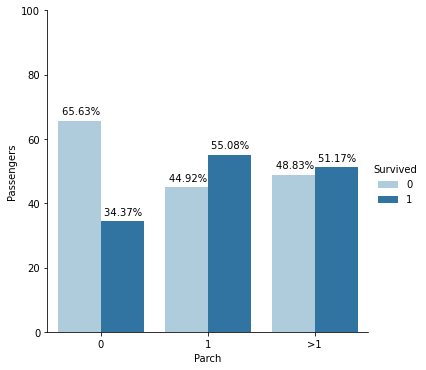

In [30]:
g = sns.catplot(data = df_3, y = 'Passengers', x = 'Parch', hue = 'Survived', kind='bar', palette = 'Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=True, scales=(-0.2,2))

1. Больше всего людей на корабле находилось без детей/родителей
2. Но статистически те кто были с родителями/детьми выживали чаще

### Аналитика по выжившим/погибшим

#### Сколько людей выжило?

In [31]:
data_train.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

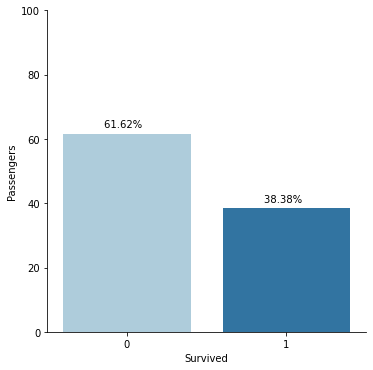

In [32]:
df = data_train.Survived.value_counts(normalize = True).mul(100).rename('percent').reset_index()
df.columns = ['Survived', 'Passengers']

g = sns.catplot(data = df, x = 'Survived', y = 'Passengers', kind = 'bar', palette='Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=True, scales=(0.1,2))

61% людей погиб, а 38% выжило

In [33]:
data_train.groupby(['Pclass']).Survived.value_counts(normalize = True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

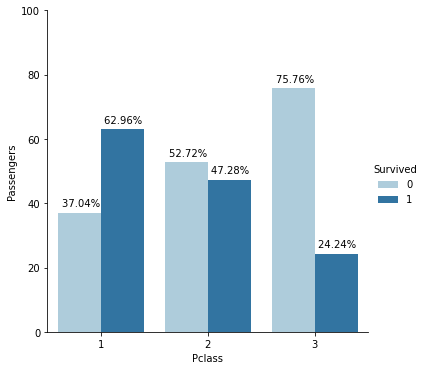

In [34]:
df = data_train.groupby(['Pclass'])['Survived'].value_counts(normalize = True).mul(100).rename('percent').reset_index()
df.columns = ['Pclass', 'Survived', 'Passengers']

g = sns.catplot(data = df, x = 'Pclass', y = 'Passengers', hue = 'Survived', kind = 'bar', palette='Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=True, scales=(-0.2,2))

Самый большой шанс выжить - в 1-ом классе, во втором почти 50-50, в то время как в 3-ем классе выживал примерно каждый четвертый

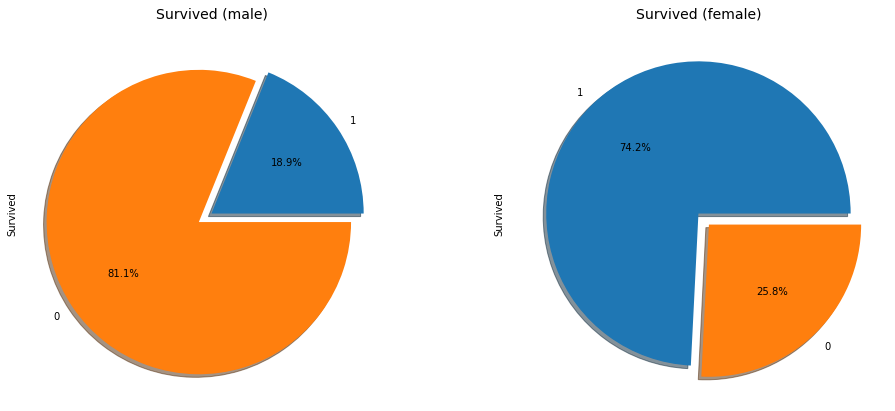

In [35]:
f,ax=plt.subplots(1,2,figsize=(16,7))
colr= {1:'blue',0:'red'}
data_train['Survived'][data_train['Sex']=='male'].value_counts(normalize = True, ascending = True).plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
data_train['Survived'][data_train['Sex']=='female'].value_counts(normalize = True).plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)', fontsize = 14)
ax[1].set_title('Survived (female)', fontsize = 14)

plt.show()

Как видно из графика, примерно каждая 4 женщина погибала, в то время как у мужчина ситуация зеркальная: выживал каждый 4 мужчина

In [36]:
pd.crosstab([data_train.Sex, data_train.Survived], data_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

1. Больше всего выживших - это женщины из 1-го класса, меньше всего - мужчин из 3-го класса
3. Интересно что в абсолютном значении количество выживших мужчин в 1 и 3 классе почти одинаковое

In [37]:
data_train.loc[(data_train['Sex'] == 'female') & (data_train['Survived'] == 0) & (data_train['Pclass'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


Было предположение, что погибшие женщины в 1-м классе преклонного возраста, но они разного возраста 

#### Аналитика шансов на выживание в зависимости от того, в каком порту сел пассажир

In [38]:
data_train.groupby(['Embarked']).Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

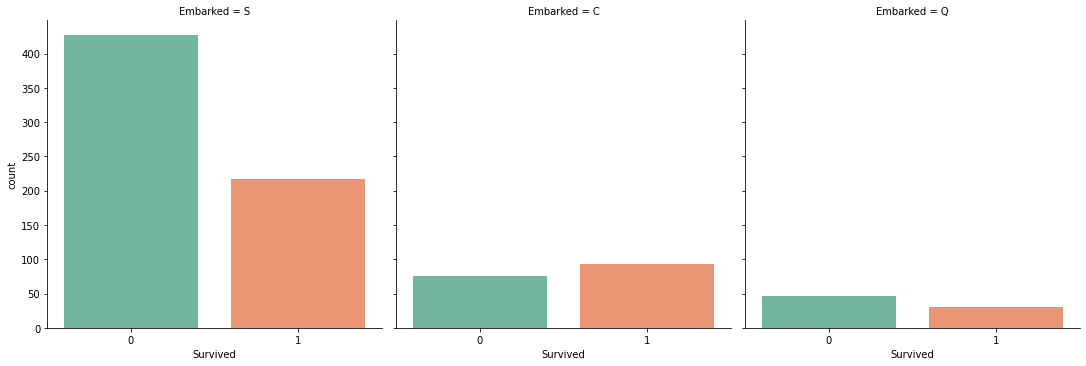

In [39]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=data_train, palette='Set2')

В абсолютных значениях больше всего выживших и погибших сели на корабль в порту S

In [40]:
data_train.groupby(['Embarked']).Survived.value_counts(normalize = True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: Survived, dtype: float64

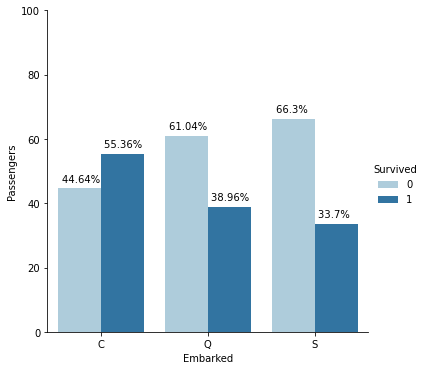

In [41]:
df = data_train.groupby(['Embarked']).Survived.value_counts(normalize = True).mul(100).rename('percent').reset_index()
df.columns = ['Embarked', 'Survived', 'Passengers']

g = sns.catplot(data = df, x = 'Embarked', y = 'Passengers', hue = 'Survived', kind = 'bar', palette='Paired')
g.ax.set_ylim(0,100)
utils.plot_values(g, frequency=True, scales=(-0.2,2))

Embarked - порт в котором сел пассажир на корабль. 
1. В процентном соотношении, наибольшие шансы на выживание у людей, севших в порту C (55%)
2. В абсолютном соотношении - больше всего выжило людей из порта S (217)

In [42]:
pd.crosstab([data_train.Survived],[data_train.Embarked, data_train.Pclass],margins = True)

Embarked   C          Q           S            All
Pclass     1   2   3  1  2   3    1    2    3     
Survived                                          
0         26   8  41  1  1  45   53   88  286  549
1         59   9  25  1  2  27   74   76   67  340
All       85  17  66  2  3  72  127  164  353  889

Учитывая разбивку по классам:
1. Большая часть выживших из 1 и 2 класса зашли в порту S
2. Больше всего выживших из 3 класса в относительном значении сели на корабль в порту Q
3. Больше половины всех погибших - это зашедшие в порту S пассажиры 3-го класса

In [43]:
data_train.groupby(['Embarked', 'Sex']).Age.mean()

Embarked  Sex   
C         female    28.344262
          male      32.998841
Q         female    24.291667
          male      30.937500
S         female    27.771505
          male      30.291440
Name: Age, dtype: float64

In [44]:
data_train.groupby(['Embarked', 'Sex', 'Survived']).Age.mean()

Embarked  Sex     Survived
C         female  0           25.583333
                  1           28.645455
          male    0           34.744444
                  1           29.725833
Q         female  0           28.100000
                  1           21.571429
          male    0           31.066667
                  1           29.000000
S         female  0           24.698113
                  1           28.996241
          male    0           31.176667
                  1           26.386029
Name: Age, dtype: float64

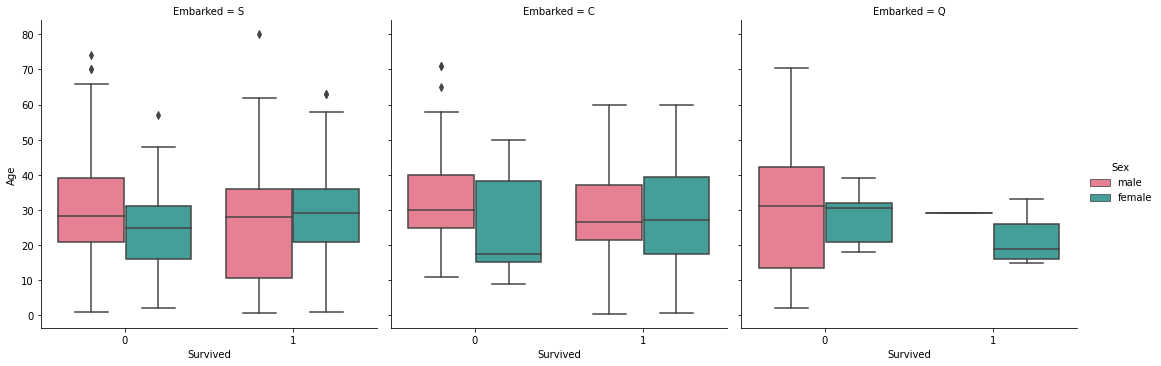

In [45]:

sns.catplot(col = 'Embarked', x = 'Survived', hue = 'Sex', y = 'Age', kind = 'box', data = data_train, palette='husl', dodge = True)

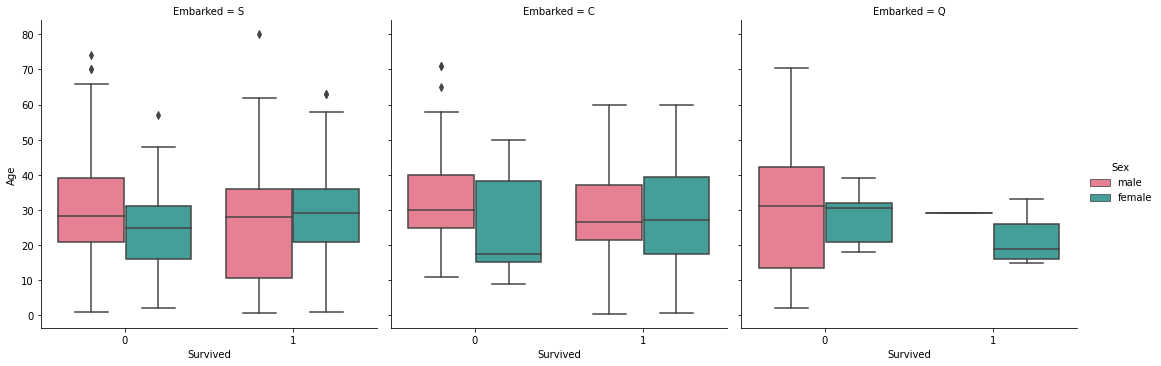

In [46]:
sns.catplot(col = 'Embarked', x = 'Survived', hue = 'Sex', y = 'Age', kind = 'box', data = data_train, palette='husl')

1. Более взрослые люди садились на корабль в порту С
2. Самые молодые девушки садились на корабль в порту Q
3. Шансы на выживание у более возрастных девушек (28+) из порта С и S выше. В порту Q - наоборот
4. При этом более взрослые мужчины вне зависимости от порта имели умирали чаще

In [47]:
pd.crosstab([data_train.Survived],[data_train.Embarked, data_train.Pclass, data_train.Sex],
            values = data_train.Name, aggfunc = 'count',margins = True)

Embarked      C                                      Q                   \
Pclass        1            2            3            1           2        
Sex      female  male female  male female  male female male female male   
Survived                                                                  
0           1.0  25.0    NaN   8.0    8.0  33.0    NaN  1.0    NaN  1.0   
1          42.0  17.0    7.0   2.0   15.0  10.0    1.0  NaN    2.0  NaN   
All        43.0  42.0    7.0  10.0   23.0  43.0    1.0  1.0    2.0  1.0   

Embarked                   S                                   All  
Pclass        3            1            2            3              
Sex      female  male female  male female  male female   male       
Survived                                                            
0           9.0  36.0    2.0  51.0    6.0  82.0   55.0  231.0  549  
1          24.0   3.0   46.0  28.0   61.0  15.0   33.0   34.0  340  
All        33.0  39.0   48.0  79.0   67.0  97.0   88.0  265.0  889

1. Все женщины из 2-го класса и почти все из 1-го класса, зашедшие на корабль в порту С  - выжили
2. Все мужчины из 1 и 2 класса, зашедшие в порту Q - погибли
3. Больше всего женщин из 1 и 2 класса выживало (в абсолютном значении), при условии что они сели на корабль в порту S. В относительном - шансов из порта С было больше
4. При этом почти все мужчины из 3 класса, севших в порту S - погибли
5. Больше всего мужчин во всех классах выжило из порта С (в относительном значении)

#### Аналитика цен на билеты

In [48]:
data_train.groupby(['Pclass','Sex']).Fare.mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

In [49]:
data_train.groupby(['Survived']).Fare.mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [50]:
data_train.groupby(['Survived']).Fare.count()

Survived
0    549
1    342
Name: Fare, dtype: int64

In [51]:
data_train.groupby(['Embarked', 'Survived']).Fare.mean()

Embarked  Survived
C         0           35.443335
          1           79.720926
Q         0           13.335904
          1           13.182227
S         0           20.743987
          1           39.547081
Name: Fare, dtype: float64

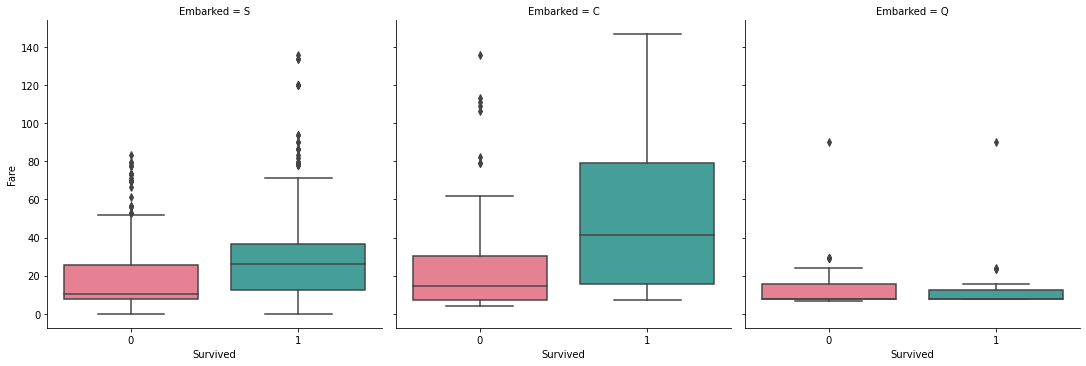

In [52]:
sns.catplot(col = 'Embarked', data = data_train[data_train['Fare']<150], x = 'Survived', y = 'Fare', kind = 'box', palette='husl')

In [53]:
data_train.groupby(['Pclass','Sex', 'Survived']).Fare.mean()

Pclass  Sex     Survived
1       female  0           110.604167
                1           105.978159
        male    0            62.894910
                1            74.637320
2       female  0            18.250000
                1            22.288989
        male    0            19.488965
                1            21.095100
3       female  0            19.773093
                1            12.464526
        male    0            12.204469
                1            15.579696
Name: Fare, dtype: float64

1. У женщин средняя цена на билет выше. Получается что у женщин были более дорогие билеты
2. У выживших были более дорогие билеты, при этом общее количество билетов у выживших было меньше (потому что большая часть дорогих билетов была у женщин 1-го класса)
3. Люди, севшие на корабль в портах С и S и выжили, заплатили за билеты больше чем те же кто сел в этих портах, но погиб
4. Судя по цене билетов и тех, кто сел на корабль в порту Q - они все нахоидились в 3 классе

In [54]:
data_train.loc[data_train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Все кто не заплатили за билет были мужчинами и из порта S и практически все умерли (14 человек)

#### Аналитика по родственникам

In [55]:
pd.crosstab([data_train.Survived],[data_train.Embarked, data_train.SibSp],
            values = data_train.Name, aggfunc = 'count',margins = True)

Embarked      C                Q                      S                     \
SibSp         0     1    2     0     1    2    4      0      1     2     3   
Survived                                                                     
0          57.0  17.0  1.0  36.0   6.0  1.0  4.0  305.0   74.0  13.0  12.0   
1          52.0  36.0  5.0  23.0   5.0  2.0  NaN  133.0   71.0   6.0   4.0   
All       109.0  53.0  6.0  59.0  11.0  3.0  4.0  438.0  145.0  19.0  16.0   

Embarked                  All  
SibSp        4    5    8       
Survived                       
0         11.0  5.0  7.0  549  
1          3.0  NaN  NaN  340  
All       14.0  5.0  7.0  889

1. Все семьи от 5 человек, севшие в порту S, погибли.
2. Больше всего людей выживало, которые были без родственников
3. Вне зависимости от порта, люди с одним родственников выживали намного чаще чем те, у которых было больше одного
4. Больше всего одиноких людей выжило из порта S, но в относительном значении - из порта С

In [56]:
data_train.groupby([data_train.Sex, data_train.Survived, data_train.SibSp]).Name.count()

Sex     Survived  SibSp
female  0         0         37
                  1         26
                  2          3
                  3          7
                  4          4
                  5          1
                  8          3
        1         0        137
                  1         80
                  2         10
                  3          4
                  4          2
male    0         0        361
                  1         71
                  2         12
                  3          5
                  4         11
                  5          4
                  8          4
        1         0         73
                  1         32
                  2          3
                  4          1
Name: Name, dtype: int64

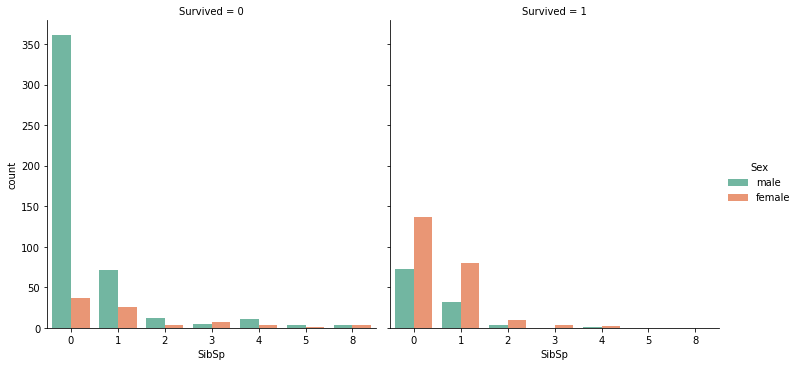

In [57]:
sns.catplot(col = 'Survived', x='SibSp', hue='Sex', kind='count', data=data_train, palette='Set2')

Топ тех кто выживал, в зависимости от количества родственников и пола:
1. Женщины одиночки (137)
2. Женщины с одним родственником (80)
3. Мужчины одиночки (73)
4. Мужчины с одним родственником (32)
5. Женщины с двумя родственниками (10)

#### Аналитика по возрасту

In [65]:
data_train.loc[data_train['Age'] <= 18].groupby(['Pclass']).Survived.value_counts(normalize = True)

Pclass  Survived
1       1           0.875000
        0           0.125000
2       1           0.793103
        0           0.206897
3       0           0.648936
        1           0.351064
Name: Survived, dtype: float64

1. В 1 классе: погибал каждый пятый ребенок
2. Во 2 классе: погибал каждый четвертый ребенок
3. В 3 классе: выживал каждый третий ребенок

In [66]:
data_train.loc[(data_train['Age'] > 18) & (data_train['Age'] <= 60)].groupby(['Pclass']).Survived.value_counts(normalize = True)

Pclass  Survived
1       1           0.673077
        0           0.326923
2       0           0.581560
        1           0.418440
3       0           0.800781
        1           0.199219
Name: Survived, dtype: float64

Шансы на выживание у людей от 20 до 60 лет уменьшаются с каждый классом (во 2 и 3 - меньше 50%)

In [60]:
data_train.loc[data_train['Age'] > 60].groupby(['Pclass']).Survived.value_counts(normalize = True)

Pclass  Survived
1       0           0.785714
        1           0.214286
2       0           0.666667
        1           0.333333
3       0           0.800000
        1           0.200000
Name: Survived, dtype: float64

Больше всего людей преклонного возраста выжило во 2-м классе, причем в 1 и 3 классе - шансы примерно равны

Отсюда можно сделать вывод что приоритетными людьми на спасение из 1-го класса были молодые женщины

In [61]:
data_train[data_train['Survived'] == 1].Age.mean()

28.343689655172415

In [62]:
data_train[data_train['Survived'] == 0].Age.mean()

30.62617924528302

<AxesSubplot:ylabel='Frequency'>

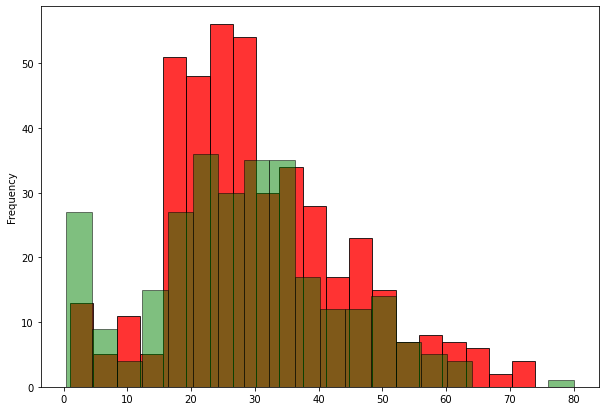

In [63]:
data_train[data_train['Survived']==0].Age.plot.hist(bins=20,edgecolor='black',color='red', alpha = 0.8,figsize=(10,7))
data_train[data_train['Survived']==1].Age.plot.hist(color='green',bins=20,edgecolor='black', alpha = 0.5,figsize=(10,7))

1. Детей выживало намного больше и все 70+ старики тоже выжили
2. Средний возраст погибших и выживших примерно равен. Но в среднем погибали более взрослые люди. Свиг произошел скорей всего за счет того, что дети выживали чаще чем старики и как говорилось ранее - большая часть молодых женщин из 1 класса тоже

Матрица корреляций

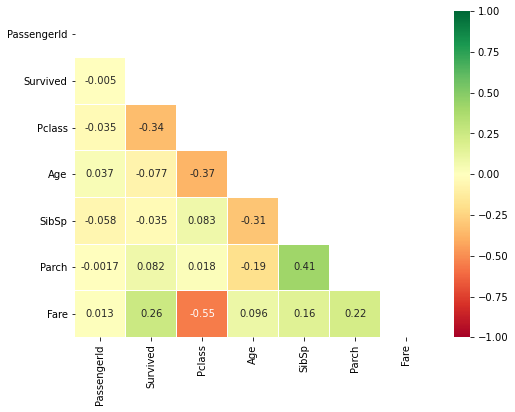

In [64]:
corr = data_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.1, mask = mask, vmin=-1, vmax=1) 
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Выводы из матрицы корреляции:
1. Цена билета отрицательно скоррелирована с классом, что логично
2. Есть положительная корреляция между наличием родителей на корабле (Parch) и наличием родственников (SibSp)
3. PassengerID слабо скоррелирована со всеми фичами. Эта переменная не несет в себе никакой пользы
4. Судя по матрице переменная Survived положительно скоррелирована с ценой билета (Fare) и отрицательно с классом. Отсюда можно сделать вывод что для предсказания переменной Survived можно убрать переменную Pclass или Fare.